Student Performance from https://www.kaggle.com/datasets/stealthtechnologies/predict-student-performance-dataset/data

This synthetic dataset models student performance based on factors like study habits, sleep patterns, socioeconomic background, and class attendance. Each row represents a hypothetical student, with input features and a calculated grade.

# 1️⃣ Data Preprocessing

## Import Data



In [ ]:
import pandas as pd
df = pd.read_csv('/content/data.csv')

In [ ]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


## Normalization

This code snippet is performing a process called normalization on the dataset. Normalization is a technique used in data preprocessing to scale numerical data to a common range, typically between 0 and 1.

In [ ]:
import pandas as pd

data = df.copy()

for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

data = data.round(5)

data

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95370,0.28261,0.65385,0.21667,0.25424
1,0.83956,0.26087,0.21154,0.25000,0.05085
2,0.64435,0.26087,0.86538,0.01667,0.00000
3,0.17593,0.26087,0.65385,0.11667,0.03390
4,0.56001,0.32609,1.00000,0.58333,0.01695
...,...,...,...,...,...
1383,0.38308,0.51087,0.61538,0.18333,0.15254
1384,0.47119,0.44565,0.32692,0.38333,0.08475
1385,0.86884,0.33696,0.26923,0.23333,0.06780
1386,0.41409,0.29348,0.48077,0.35000,0.03390


## Normal Distribution

In [ ]:
grade_counts = data['Grades'].value_counts()
grade_counts

,count
Grades,
0.03390,349
0.05085,194
0.01695,167
0.06780,47
0.25424,33
0.30508,31
0.08475,30
0.13559,30
0.15254,28


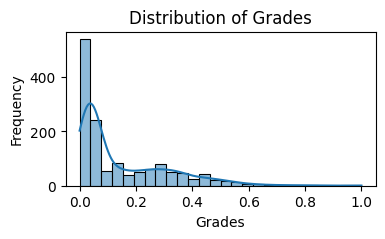

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 2))
sns.histplot(data['Grades'], kde=True)
plt.title('Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(data.columns)

Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')


In [ ]:
print(data.describe())

       Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  \
count          1388.000000  1388.000000  1388.000000     1388.000000   
mean              0.501919     0.408784     0.624474        0.308934   
std               0.290774     0.206258     0.263596        0.194588   
min               0.000000     0.000000     0.000000        0.000000   
25%               0.245775     0.290763     0.423080        0.150000   
50%               0.494875     0.336960     0.692310        0.283330   
75%               0.766055     0.554350     0.826920        0.433330   
max               1.000000     1.000000     1.000000        1.000000   

            Grades  
count  1388.000000  
mean      0.147317  
std       0.160463  
min       0.000000  
25%       0.033900  
50%       0.050850  
75%       0.254240  
max       1.000000  


# 2️⃣ Training Model

## Resampling

This section of the code focuses on preparing the data for a machine learning model and addressing a potential issue called class imbalance.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

data['Category'] = pd.qcut(data['Grades'], q=5, labels=[0, 1, 2, 3, 4])
X = data[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = data['Category']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(data['Category'].value_counts().sort_index())

Category
0    540
1    194
2    101
3    281
4    272
Name: count, dtype: int64


## Models and Metrics

Models Used: Decision Tree, Logistic Regression, SVM, Naive Bayes, KNN

Metrics Used: Accuracy, Precision, Recall, F1 - Score, Weighted
F1 - Score

###● Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.89444
weighted f1-score: 0.89190

              precision    recall  f1-score   support

           0       0.88      0.63      0.73       107
           1       0.71      0.91      0.80        98
           2       0.94      1.00      0.97       117
           3       0.97      0.95      0.96       102
           4       0.98      0.97      0.98       116

    accuracy                           0.89       540
   macro avg       0.90      0.89      0.89       540
weighted avg       0.90      0.89      0.89       540

[[ 67  34   6   0   0]
 [  9  89   0   0   0]
 [  0   0 117   0   0]
 [  0   2   1  97   2]
 [  0   0   0   3 113]]


#### Tuning + Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

model_results = {}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("best hyperparameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred), "\n")

cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"best cross-validation score: {grid_search.best_score_:.5f}")
print(f"cross-validation score with standard deviation: {cv_scores.mean():.5f} ± {cv_scores.std():.5f}")

model_results['Decision Tree'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy: 0.89444
weighted f1-score: 0.89190

              precision    recall  f1-score   support

           0       0.88      0.63      0.73       107
           1       0.71      0.91      0.80        98
           2       0.94      1.00      0.97       117
           3       0.97      0.95      0.96       102
           4       0.98      0.97      0.98       116

    accuracy                           0.89       540
   macro avg       0.90      0.89      0.89       540
weighted avg       0.90      0.89      0.89       540

[[ 67  34   6   0   0]
 [  9  89   0   0   0]
 [  0   0 117   0   0]
 [  0   2   1  97   2]
 [  0   0   0   3 113]] 

best cross-validation score: 0.88750
cross-validation score with standard deviation: 0.88750 ± 0.00849


###● Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.54259
weighted f1-score: 0.54109

              precision    recall  f1-score   support

           0       0.43      0.36      0.39       107
           1       0.39      0.41      0.40        98
           2       0.50      0.54      0.52       117
           3       0.52      0.55      0.53       102
           4       0.83      0.83      0.83       116

    accuracy                           0.54       540
   macro avg       0.53      0.54      0.53       540
weighted avg       0.54      0.54      0.54       540

[[38 51 17  1  0]
 [37 40 16  5  0]
 [12 12 63 30  0]
 [ 1  0 26 56 19]
 [ 0  0  4 16 96]]


#### Tuning + Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

model_results['Logistic Regression'] = {}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("best hyperparameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred), "\n")

cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"best cross-validation score: {grid_search.best_score_:.5f}")
print(f"cross-validation score with standard deviation: {cv_scores.mean():.5f} ± {cv_scores.std():.5f}")

model_results['Logistic Regression'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
accuracy: 0.55000
weighted f1-score: 0.54792

              precision    recall  f1-score   support

           0       0.44      0.35      0.39       107
           1       0.40      0.39      0.39        98
           2       0.51      0.63      0.56       117
           3       0.53      0.55      0.54       102
           4       0.85      0.79      0.82       116

    accuracy                           0.55       540
   macro avg       0.54      0.54      0.54       540
weighted avg       0.55      0.55      0.55       540

[[37 50 19  1  0]
 [36 38 21  3  0]
 [11  7 74 25  0]
 [ 1  0 29 56 16]
 [ 0  0  3 21 92]] 

best cross-validation score: 0.55463
cross-validation score with standard deviation: 0.55463 ± 0.01890


###● SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = SVC(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.74815
weighted f1-score: 0.74533

              precision    recall  f1-score   support

           0       0.61      0.43      0.50       107
           1       0.49      0.59      0.54        98
           2       0.75      0.91      0.83       117
           3       0.91      0.84      0.87       102
           4       0.98      0.92      0.95       116

    accuracy                           0.75       540
   macro avg       0.75      0.74      0.74       540
weighted avg       0.75      0.75      0.75       540

[[ 46  54   7   0   0]
 [ 26  58  14   0   0]
 [  4   6 107   0   0]
 [  0   0  14  86   2]
 [  0   0   0   9 107]]


#### Tuning + Cross Validation

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

model_results['SVM'] = {}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("best hyperparameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred), "\n")

cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"best cross-validation score: {grid_search.best_score_:.5f}")
print(f"cross-validation score with standard deviation: {cv_scores.mean():.5f} ± {cv_scores.std():.5f}")

model_results['SVM'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

best hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
accuracy: 0.77037
weighted f1-score: 0.76836

              precision    recall  f1-score   support

           0       0.57      0.48      0.52       107
           1       0.49      0.54      0.51        98
           2       0.83      0.89      0.86       117
           3       0.94      0.94      0.94       102
           4       0.97      0.97      0.97       116

    accuracy                           0.77       540
   macro avg       0.76      0.76      0.76       540
weighted avg       0.77      0.77      0.77       540

[[ 51  50   6   0   0]
 [ 33  53  12   0   0]
 [  5   6 104   2   0]
 [  0   0   3  96   3]
 [  0   0   0   4 112]] 

best cross-validation score: 0.75324
cross-validation score with standard deviation: 0.75324 ± 0.01158


###● Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.45926
weighted f1-score: 0.46459

              precision    recall  f1-score   support

           0       0.46      0.36      0.40       107
           1       0.29      0.34      0.31        98
           2       0.40      0.48      0.43       117
           3       0.44      0.43      0.43       102
           4       0.77      0.66      0.71       116

    accuracy                           0.46       540
   macro avg       0.47      0.45      0.46       540
weighted avg       0.48      0.46      0.46       540

[[38 49 20  0  0]
 [40 33 25  0  0]
 [ 5 25 56 31  0]
 [ 0  8 27 44 23]
 [ 0  0 13 26 77]]


#### Tuning + Cross Validation

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

model_results['Naive Bayes'] = {}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("best hyperparameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred), "\n")

cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"best cross-validation score: {grid_search.best_score_:.5f}")
print(f"cross-validation score with standard deviation: {cv_scores.mean():.5f} ± {cv_scores.std():.5f}")

model_results['Naive Bayes'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

best hyperparameters: {'var_smoothing': 1e-09}
accuracy: 0.45926
weighted f1-score: 0.46459

              precision    recall  f1-score   support

           0       0.46      0.36      0.40       107
           1       0.29      0.34      0.31        98
           2       0.40      0.48      0.43       117
           3       0.44      0.43      0.43       102
           4       0.77      0.66      0.71       116

    accuracy                           0.46       540
   macro avg       0.47      0.45      0.46       540
weighted avg       0.48      0.46      0.46       540

[[38 49 20  0  0]
 [40 33 25  0  0]
 [ 5 25 56 31  0]
 [ 0  8 27 44 23]
 [ 0  0 13 26 77]] 

best cross-validation score: 0.49676
cross-validation score with standard deviation: 0.49676 ± 0.02698


###● KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.76111
weighted f1-score: 0.76028

              precision    recall  f1-score   support

           0       0.67      0.50      0.57       107
           1       0.55      0.69      0.61        98
           2       0.84      0.89      0.86       117
           3       0.83      0.81      0.82       102
           4       0.92      0.88      0.90       116

    accuracy                           0.76       540
   macro avg       0.76      0.76      0.75       540
weighted avg       0.77      0.76      0.76       540

[[ 54  45   6   2   0]
 [ 23  68   7   0   0]
 [  2  10 104   1   0]
 [  2   1   7  83   9]
 [  0   0   0  14 102]]


#### Tuning + Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

model_results['KNN'] = {}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("best hyperparameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred), "\n")

cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"best cross-validation score: {grid_search.best_score_:.5f}")
print(f"cross-validation score with standard deviation: {cv_scores.mean():.5f} ± {cv_scores.std():.5f}")

model_results['KNN'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
accuracy: 0.88889
weighted f1-score: 0.88491

              precision    recall  f1-score   support

           0       0.94      0.59      0.72       107
           1       0.70      0.95      0.81        98
           2       0.94      0.99      0.97       117
           3       0.93      0.94      0.94       102
           4       0.97      0.97      0.97       116

    accuracy                           0.89       540
   macro avg       0.90      0.89      0.88       540
weighted avg       0.90      0.89      0.88       540

[[ 63  38   3   3   0]
 [  4  93   1   0   0]
 [  0   1 116   0   0]
 [  0   0   3  96   3]
 [  0   0   0   4 112]] 

best cross-validation score: 0.84167
cross-validation score with standard deviation: 0.84167 ± 0.00999


##💯 Model Performance

In [ ]:
import pandas as pd

train_results = pd.DataFrame(model_results).T
train_results

,accuracy,f1_score
Decision Tree,0.894444,0.891898
Logistic Regression,0.550000,0.547925
SVM,0.770370,0.768359
Naive Bayes,0.459259,0.464588
KNN,0.888889,0.884910


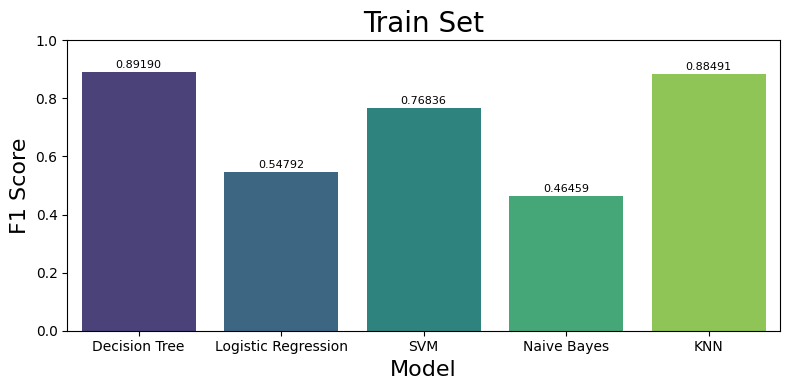

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=train_results.index, y=train_results["f1_score"], palette="viridis")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Train Set", fontsize=20)
plt.xlabel("Model", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 3️⃣ Testing Model

## Original Imbalanced Dataset

In [ ]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


In [ ]:
df['Category'] = pd.qcut(df['Grades'], q=5, labels=[0, 1, 2, 3, 4])
X = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = df['Category']
print(df['Category'].value_counts().sort_index())

Category
0    540
1    194
2    101
3    281
4    272
Name: count, dtype: int64


## Models and Metrics

###● Decision Tree

In [ ]:
model_results = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model_results['Decision Tree'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

accuracy: 0.66906
weighted f1-score: 0.66289

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       103
           1       0.32      0.25      0.28        48
           2       0.38      0.42      0.40        24
           3       0.82      0.84      0.83        55
           4       0.93      0.85      0.89        48

    accuracy                           0.67       278
   macro avg       0.63      0.62      0.62       278
weighted avg       0.66      0.67      0.66       278

[[77 20  6  0  0]
 [32 12  4  0  0]
 [ 6  5 10  3  0]
 [ 0  0  6 46  3]
 [ 0  0  0  7 41]]


###● Logistic Regression

In [ ]:
model_results['Logistic Regression'] = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model_results['Logistic Regression'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

accuracy: 0.51079
weighted f1-score: 0.53304

              precision    recall  f1-score   support

           0       0.65      0.36      0.46       103
           1       0.34      0.44      0.38        48
           2       0.21      0.67      0.32        24
           3       0.73      0.55      0.62        55
           4       0.88      0.79      0.84        48

    accuracy                           0.51       278
   macro avg       0.56      0.56      0.53       278
weighted avg       0.61      0.51      0.53       278

[[37 39 26  1  0]
 [16 21 11  0  0]
 [ 4  1 16  3  0]
 [ 0  1 19 30  5]
 [ 0  0  3  7 38]]


###● SVM

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

model_results['SVM'] = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model_results['SVM'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

accuracy: 0.24820
weighted f1-score: 0.19235

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.20      0.44      0.28        48
           2       0.05      0.04      0.05        24
           3       0.24      0.58      0.34        55
           4       0.65      0.31      0.42        48

    accuracy                           0.25       278
   macro avg       0.23      0.27      0.22       278
weighted avg       0.20      0.25      0.19       278

[[ 0 54 11 38  0]
 [ 0 21  5 22  0]
 [ 0  9  1 14  0]
 [ 0 13  2 32  8]
 [ 0  6  0 27 15]]


###● Naive Bayes

In [ ]:
model_results['Naive Bayes'] = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model_results['Naive Bayes'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

accuracy: 0.59712
weighted f1-score: 0.50400

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       103
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        24
           3       0.53      0.64      0.58        55
           4       0.73      0.62      0.67        48

    accuracy                           0.60       278
   macro avg       0.37      0.45      0.40       278
weighted avg       0.45      0.60      0.50       278

[[101   0   0   2   0]
 [ 45   0   0   3   0]
 [ 14   0   0  10   0]
 [  9   0   0  35  11]
 [  2   0   0  16  30]]


###● KNN

In [ ]:
model_results['KNN'] = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.5f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"weighted f1-score: {f1:.5f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model_results['KNN'] = {
    'accuracy': accuracy,
    'f1_score': f1
}

accuracy: 0.58633
weighted f1-score: 0.53780

              precision    recall  f1-score   support

           0       0.55      0.90      0.68       103
           1       0.43      0.12      0.19        48
           2       0.40      0.08      0.14        24
           3       0.60      0.58      0.59        55
           4       0.81      0.62      0.71        48

    accuracy                           0.59       278
   macro avg       0.56      0.46      0.46       278
weighted avg       0.57      0.59      0.54       278

[[93  7  0  3  0]
 [39  6  1  2  0]
 [16  0  2  6  0]
 [14  0  2 32  7]
 [ 7  1  0 10 30]]


##💯 Model Performance

In [ ]:
import pandas as pd

test_results = pd.DataFrame(model_results).T
test_results

,accuracy,f1_score
Decision Tree,0.669065,0.662887
Logistic Regression,0.510791,0.533041
SVM,0.248201,0.192347
Naive Bayes,0.597122,0.504000
KNN,0.586331,0.537804


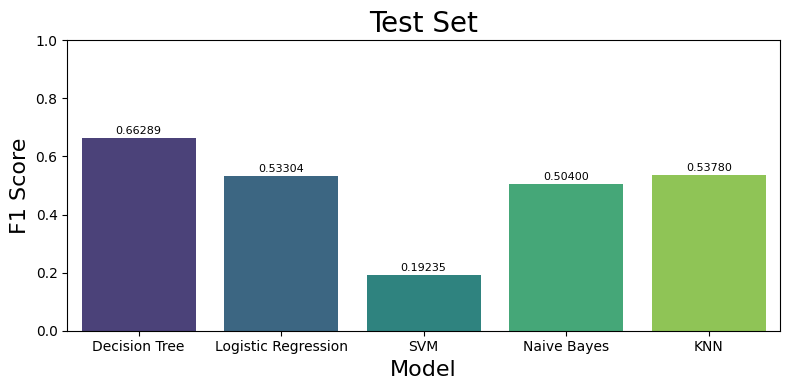

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=test_results.index, y=test_results["f1_score"], palette="viridis")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Test Set", fontsize=20)
plt.xlabel("Model", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

#4️⃣ Conclusion

In [ ]:
import pandas as pd

pd.options.display.float_format = '{:,.5f}'.format
combined_results = pd.concat([train_results, test_results], axis=1, keys=['train', 'test'])
best_train_model = combined_results['train']['f1_score'].idxmax()
best_test_model = combined_results['test']['f1_score'].idxmax()
best_train_f1_score = combined_results['train'].loc[best_train_model, 'f1_score']
best_test_f1_score = combined_results['test'].loc[best_test_model, 'f1_score']

combined_results

train              test         
                    accuracy f1_score accuracy f1_score
Decision Tree        0.89444  0.89190  0.66906  0.66289
Logistic Regression  0.55000  0.54792  0.51079  0.53304
SVM                  0.77037  0.76836  0.24820  0.19235
Naive Bayes          0.45926  0.46459  0.59712  0.50400
KNN                  0.88889  0.88491  0.58633  0.53780

In [ ]:
print(f"training: {best_train_model} with F1 Score: {best_train_f1_score:.5f} | testing: {best_test_model} with F1 Score: {best_test_f1_score:.5f}")

training: Decision Tree with F1 Score: 0.89190 | testing: Decision Tree with F1 Score: 0.66289


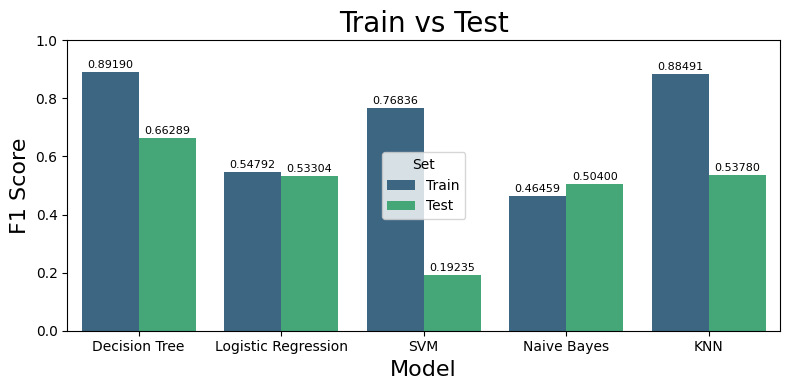

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
train_results['Model'] = train_results.index
test_results['Model'] = test_results.index
comparison_data = pd.DataFrame({
    'Model': list(train_results['Model']) + list(test_results['Model']),
    'F1_Score': list(train_results['f1_score']) + list(test_results['f1_score']),
    'Set': ['Train'] * len(train_results) + ['Test'] * len(test_results)
})
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="F1_Score", hue="Set", data=comparison_data, palette="viridis")
for p in plt.gca().patches:
    f1_value = p.get_height()
    if f1_value > 0.01:
        plt.gca().annotate(f'{f1_value:.5f}',
                           (p.get_x() + p.get_width() / 2., f1_value),
                           ha='center', va='center',
                           fontsize=8, color='black',
                           xytext=(0, 5), textcoords='offset points')
plt.title("Train vs Test", fontsize=20)
plt.xlabel("Model", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()